In [21]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !wget -nc https://raw.githubusercontent.com/AkeemSemper/ML_for_Non_DS_Students/main/data/titanic_train.csv
    FILE_PATH = 'titanic_train.csv'
    !wget -nc https://github.com/AkeemSemper/ML_for_Non_DS_Students/raw/main/data/sportsref_download.xlsx
    FILE_PATH_2 = 'sportsref_download.xlsx'
else:
    FILE_PATH = '../data/titanic_train.csv'
    FILE_PATH_2 = '../data/sportsref_download.xlsx'


# File Access

In data science we are almost always going to be connecting to some file or database to get some data. In python code we can access files or other resources by loading in a library that "knows" how to communicate with the underlying computer, then asking it to read or write what we want to access. 

There are libraries written to handle many different types of data in Python such as PDFs, Excel files, and database extracts. The most common thing we'll be using is a CSV - comma separated value - file, a CSV is more or less an Excel table without any formatting or "smarts", just the raw data. 

## Pandas

![Pandas](../images/panda.jpg "Pandas")

A key library that we'll use to access data is called Pandas. Pandas provides us with a dataframe, a type of data structure that is basically an internal spreadsheet with rows, columns, and values. Pandas does most of the file access work that we need to do for most purposes, it'll read a file in and convert it to a dataframe data structure, then we can manipulate the dataframe to get the data we need.

When we import the pandas library we'll use the `pd` alias to refer to it. This isn't required, we can not add an alias, or name it anything else we want, but `pd` is the standard and you'll see it pretty universally used. After we load a file into a dataframe we often name that dataframe `df` for the same reason, it's a standard and you'll see it used often. Note that in the file name we normally use a relative path - or instructions on how to find the file relative to the current file. The head() function gives us a little preview of the first 5 rows of the dataframe.

```python
import pandas as pd
df = pd.read_csv('data.csv')
df.head()
```

## Dataframes 

A dataframe is a data structure that is basically a spreadsheet. It has rows, columns, and values. We can access the rows, columns, and values in a dataframe in a variety of ways. Dataframes are the main data structure that we use to do the bulk of our data science work.

![Dataframe](../images/df.webp "Dataframe")

The dataframe documentation is located here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html we want to try to get used to referencing back to the documentation as we encounter things we don't know or are unsure of. Pandas has a lot of functionality and it is expressly made to help make data science stuff easier, so if we want to do something with our data, checking to see what Pandas can already do for us is a good first step. A good habit to try for the near future is to refer back to the pandas documentation if you know you need to do something, and see if you can find a function that does what you need. Despite some likely frustration at first, this is something that you'll commonly need to do if you are actually programming, and the skill of deciphering documentation is something that comes with experience. Some examples of things that you might want to look into are which values occur in a column, how many times they occur, are there any blanks, what's the largest/smallest, how large is the dataset, etc... When things like this come up, attempt to figure it out from the documentation first, then Google an example, then ask for help if you still can't figure it out.

In [22]:
import pandas as pd

df = pd.read_csv(FILE_PATH)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Dataframes as Objects

Every dataframe we create is just another data structure in Python, and just like a list or a tuple we can pass it as an argument, call functions on it, or put it into other data structures. 

### Exploring Data

When we get a new dataset, we'll want to explore it to get a feel for what we have. We'll want to look at the data types, the number of rows and columns, the number of unique values in each column, the number of blanks in each column, and some basic statistics about each column. We can do this with the following functions:

```python
    df.head() # show the first 5, or n, rows
    df.shape # show the number of rows and columns
    
    df.info() # show the data types of each column
    df.shape # show the number of rows and columns
    df.nunique() # show the number of unique values in each column
    df.isna().sum() # show the number of blanks in each column
    df.describe() # show some basic statistics about each column
```

<b>Note:</b> the .T below is a transpose, it flips the rows and columns. I think it is easier to read this way. 

In [23]:
df.shape

(891, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


We can also check for things column by column, which is nice. For example, the isna() function returns True if something is blank. Recall that True/False map to 1/0 - so a common way to look at datasets is to allow those Trues to be counted. Here, we get the number of blanks tallied for each column. 

In [26]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [28]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Dataframe Values

Just like a spreadsheet, the dataframe values can be accessed by row and column. We can use the `iloc` function to access the values by row and column number, or the `loc` function to access the values by row and column name. Note that the `iloc` function is zero based, so the first row is row 0, the second row is row 1, etc. The `loc` function is one based, so the first row is row 1, the second row is row 2, etc. The order of the rows in our dataframe is both critical and irrelevant - the data generally isn't in any particular order, so something being in row 1 or row 1,000,000 makes no difference; at the same time, when we do machine learning work later, we normally trust that the order is fixed, so row 1 is always row 1, and row 1,000,000 is always row 1,000,000. 

<b>Note:</b> we <i>can</i> address things by their coordinates in the dataframe, but it isn't often something we really want to do. We won't spend a lot of time or effort dealing with the data in this way, but it's good to know that it's possible. The pandas documentation with details and examples is here: https://pandas.pydata.org/docs/user_guide/indexing.html

In [29]:
df.iloc[0:5, 0:3]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


### Arranging Dataframe Data

In addition to selecting subsets, we can also do some other basic spreadsheet-like operations on the dataframe. We can sort by a value, and look at which values we have. 

In [30]:
df.sort_values(by='Age', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


## Slicing Dataframes

Much more often than accessing a single value in a dataframe we'll want to access a subset of the dataframe. We can do this by slicing the dataframe, or selecting a subset of the rows and columns. We can slice a dataframe by row, by column, or by both.

### Column Name and Conditional Addressing

Most often when we are selecting parts of a dataframe we'll do so using the column names for selecting columns or some condition for selecting rows. The syntax for this is follows a pattern (the final example is not common, the first 4 are):
<ul>
<li> df[ 'column_name' ] - select a single column by name </li>
<li> df[[ 'column_name_1', 'column_name_2' ]] - select multiple columns by name </li>
<li> df[df[ 'column_name'] == 'some_value' ] - select rows where the value in a column is equal to some value </li>
<li> df[df[ 'column_name'] > 100] - select rows where the value in a column is greater than some value </li>
<li> df[df[ 'column_name'].isin(['value_1', 'value_2'] )] - select rows where the value in a column is equal to one of a list of values </li>
</ul>

For example, here's some sample code to select a column, code to filter based on some value, and a combination:
    
```python
    import pandas as pd
    df = pd.read_csv('data.csv')
    # Get a column
    first_name = df['first_name']
    # Get several columns
    names = df[['first_name', 'last_name']]
    # Filter by value
    df_filtered = df[ df["income"] > 100000 ]
    # Get a column from a filtered dataframe
    df_filtered_names = df_filtered[ ['first_name', 'last_name'] ]
```

#### Loc and Iloc

We can also use the `loc` and `iloc` functions to select rows and columns. The `loc` function selects rows and columns by name, the `iloc` function selects rows and columns by number. These are sometimes needed, but they don't come up all that often for us - so you'll need to be aware of them, and able to read or understand them given a little time to look it up, but you don't need to memorize them. A table showing some examples is here:

![Loc and Iloc](../images/loc_iloc.png "Loc and Iloc")

The `loc` function is inclusive of the last value, the `iloc` function is exclusive of the last value. This is a common source of confusion, so it's worth noting.

<b>Note: Please do not get overly stressed or worried about all the different ways to slice data out of a dataframe. The vast majority of times that we need to slice or select from a dataframe, it will be done by either just naming a column, or specifying a filter condition. The iloc, loc, and more elaborate stuff is less common, and it is something that we can always just look up if needed - as long as you understand, in English, what you need to select, it is easy to look up exactly what command is needed to do so. Seriously, this looks more daunting than it is.</b>

In [31]:
#Selecting columns
df[['Name', 'Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [32]:
#Selecting rows
df[df['Age'] > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [33]:
#Selecting rows and columns
df.loc[df['Age'] > 70, ['Name', 'Age']]

,Name,Age
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
493,"Artagaveytia, Mr. Ramon",71.0
630,"Barkworth, Mr. Algernon Henry Wilson",80.0
851,"Svensson, Mr. Johan",74.0


In [34]:
# Or in a more easy to understand format with a temporary variable
tmp = df[df['Age'] > 70]
tmp[['Name', 'Age']]

,Name,Age
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
493,"Artagaveytia, Mr. Ramon",71.0
630,"Barkworth, Mr. Algernon Henry Wilson",80.0
851,"Svensson, Mr. Johan",74.0


## Grouping and Aggregation

As in Excel, we can group data in a dataframe and then perform some aggregation on the grouped data. The syntax for this is:

```python
    df.groupby( 'column_name' ).agg( 'aggregation_function' ) # group the data by the values in a column, then perform some aggregation on the grouped data 
```

<b>Note:</b> if we are grouping, we need to perform some aggregation, or it doesn't make sense. We can group by a column and then count the number of rows in each group, or we can group by a column and then sum the values in another column, but we can't group by a column and then just show the values in another column - value would be shown? The first? The last? The average? The sum? The max? The min? It doesn't make sense to group by a column and then show the values in another column without some aggregation. We can provide the aggregation functions as a dictionary, and whatever is in there will be calculated. Each key/value pair is the name of the column, along with the calculation we want. 

In [35]:
# Grouping
df.groupby("Sex").agg({"Survived": "mean"})

,Survived
Sex,
female,0.742038
male,0.188908


We can also group by multiple columns, which allows us to generate subgroups based on more than one condition. The syntax for this is:

```python
    df.groupby( ['column_name_1', 'column_name_2'] ).agg( 'aggregation_function' ) # group the data by the values in multiple columns, then perform some aggregation on the grouped data 
```

This example also does a few different aggregations for the results.

In [36]:
df.groupby(["Embarked", "Sex"]).agg({"Survived": "mean", "Age": "median", "PassengerId": "count"})

Survived   Age  PassengerId
Embarked Sex                                
C        female  0.876712  24.0           73
         male    0.305263  30.0           95
Q        female  0.750000  21.5           36
         male    0.073171  30.0           41
S        female  0.689655  27.0          203
         male    0.174603  28.0          441

## Exercise

Slice and dice our dataframe to get the following subsets:
<ul>
<li> The first 10 rows of the dataframe </li>
<li> The last 10 rows of the dataframe </li>
<li> The first 10 rows of the dataframe, but only the columns named 'Name' and 'Age' </li>
<li> The median Fare for each Sex where the 'Age' column is greater than 50 </li>
<li> The rows where the 'Age' column is greater than 50, but only the columns named 'Name' and 'Age' </li>
<li> The rows where the 'Age' column is greater than 50, but only the columns named 'Name' and 'Age', sorted by the 'Age' column in descending order </li>
<li> The median age for each "Embarked" class. </li>
<li> The probability of survival for each "Pclass" and "Sex" combination. E.g. men in class 1, women in class 3, etc...</li>
</ul>

In [37]:
#Code


### Looping Through a Dataframe

We can loop through a dataframe by row, or by column. We can also loop through a dataframe by row and column. There are several ways to do this, the most direct being using the iterrows() function in a for loop, the syntax for this is:

```python
    for index, row in df.iterrows(): # loop through the dataframe by row
        print( row ) # print the row
```

Or, slghtly more complicated, we can loop through the dataframe by row and column, the syntax for this is:

```python
    for index, row in df.iterrows(): # loop through the dataframe by row
        for column in df.columns: # loop through the dataframe by column
            print( row[column] ) # print the value in a column for each row
```

The iterrows() function iterates through the rows of the dataframe, and in each iteration of the loop it provides two values - the index of that row, and the row itself as an object. Each row that is returned can be used as though it is a one row dataframe - we can use column names to grab specific values. Note that this can be slow for large dataframes, there are alternate methods to do many of the things we'd want to loop for, but more expediently. 

In [38]:
for index, row in df.iterrows():
    if row["Survived"] == 1:
        print("I'm better than Leo: " + row["Name"])

I'm better than Leo: Cumings, Mrs. John Bradley (Florence Briggs Thayer)
I'm better than Leo: Heikkinen, Miss. Laina
I'm better than Leo: Futrelle, Mrs. Jacques Heath (Lily May Peel)
I'm better than Leo: Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
I'm better than Leo: Nasser, Mrs. Nicholas (Adele Achem)
I'm better than Leo: Sandstrom, Miss. Marguerite Rut
I'm better than Leo: Bonnell, Miss. Elizabeth
I'm better than Leo: Hewlett, Mrs. (Mary D Kingcome) 
I'm better than Leo: Williams, Mr. Charles Eugene
I'm better than Leo: Masselmani, Mrs. Fatima
I'm better than Leo: Beesley, Mr. Lawrence
I'm better than Leo: McGowan, Miss. Anna "Annie"
I'm better than Leo: Sloper, Mr. William Thompson
I'm better than Leo: Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
I'm better than Leo: O'Dwyer, Miss. Ellen "Nellie"
I'm better than Leo: Spencer, Mrs. William Augustus (Marie Eugenie)
I'm better than Leo: Glynn, Miss. Mary Agatha
I'm better than Leo: Mamee, Mr. Hanna
I'm better than L

## Exercise

Loop through the data, get every valid fare, put it in a list. Create a function to do this:
<ul>
<li> Function name: get_number_list </li>
<li> Arguments (Inputs):</li>
    <ul>
    <li> df - the dataframe to loop through </li>
    <li> column_name - the name of the column to loop through </li>
    </ul>
<li> Returns: a list of all the values in the column </li>

In [39]:
# Define Function


# Call Function on the Data



### Basics of Data Visualization

<b>Note:</b> From here down, the items are more for context and understanding, we'll revisit this later on in more detail.

We can also visualize the data, which gives us the ability to get a quick look at aspects of our data - including outliers and distributions. This is one of the first steps that we need to do when looking at doing some machine learning, and something we'll get into more later. 

There are many different libraries that do much of the hard work of helping us generate visualizations. The most common library for this is called matplotlib, which provides a lot of the core plotting functionality, but is generally pretty annoying to use. We'll use a library called seaborn, which is built on top of matplotlib, and makes it much easier to generate nice looking plots.

<b>Note:</b> plotting libraries are often built "on top of" other libraries, like seaborn is built on top of matplotlib. One thing that may occur in scenarios like this is that something might be needed by the library we're using, such as seaborn, but isn't already imported. In these cases, we just need to import what it asks for, and install it if it doesn't. 

In [40]:
import seaborn as sns

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

#### Pandas and Other Data Types

The CSV filetype is by far the most commonly used for small scale data science work, but we do commonly use other file types. Pandas itself is pretty capable and can handle lots of similar file types, most notably Excel files. The Panda's documentation has a list of the file types it can handle here: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html One thing to note is that it can usually handle zipped files without us having to unzip them first, so if you have larger CSV datasets that are zipped, you can use them in their compressed state. CSV datasets tend to compress very well, so this can save a lot of space, and if you're using GitHub or some other repository to store code, this can help you from going over size limits. 

The pandas read functions also provide several arguments that are occasionally used, here we specify that the first row of the file is a header row in the Excel file. There are others for selecting a sheet, or the encoding of the data. These details are normally only needed if our file doesn't load correctly, pandas is good at figuring out most common things, but if it doesn't load properly (and you know the file itself is ok), then it is fairly likely that we need to provide some additional argument to tell pandas how to understand the file. Most times when this happens, Googling the error will give one or two things like this to try, I've personally never had those recommendations not work. 

<b>Note:<b> in most production environments we will probably use a connection to a database rather than load a file. The concepts are almost identical, we'd just replace the "read_csv" part that we used here with a similar command(s) to grab the desired data from the database. With larger scale examples such as neural networks, that still holds - rather than making datasets from the data in our file, we would make them from our database connection. Once we have the data in our program, it doesn't matter where it came from. In fact, we can replace the "load some data" part of most of the code we write with some other chunk of code that loads the data from somewhere else, and the rest of the code will work the same.

In [ ]:
df_excel = pd.read_excel(FILE_PATH_2, header=1)
df_excel.head()

,Rk,Unnamed: 1,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1.0,Florida Panthers,27.5,6,6,0,0,12,1.000,27,...,85.19,1,1,10.8,11.8,210,12.9,189,0.937,0
1,2.0,Carolina Hurricanes,27.9,5,5,0,0,10,1.000,22,...,90.00,0,0,8.0,8.0,175,12.6,149,0.946,0
2,3.0,Edmonton Oilers,29.4,5,5,0,0,10,1.000,23,...,88.24,1,0,13.0,8.6,168,13.7,188,0.931,0
3,4.0,St. Louis Blues,28.8,5,5,0,0,10,1.000,25,...,93.75,1,0,9.0,10.2,174,14.4,170,0.935,1
4,5.0,Minnesota Wild,29.4,6,5,1,0,10,0.833,20,...,69.23,0,0,13.3,12.0,218,9.2,167,0.892,0


In [ ]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          32 non-null     float64
 1   Unnamed: 1  33 non-null     object 
 2   AvAge       33 non-null     float64
 3   GP          33 non-null     int64  
 4   W           33 non-null     int64  
 5   L           33 non-null     int64  
 6   OL          33 non-null     int64  
 7   PTS         33 non-null     int64  
 8   PTS%        33 non-null     float64
 9   GF          33 non-null     int64  
 10  GA          33 non-null     int64  
 11  SOW         32 non-null     float64
 12  SOL         32 non-null     float64
 13  SRS         32 non-null     float64
 14  SOS         32 non-null     float64
 15  GF/G        32 non-null     float64
 16  GA/G        32 non-null     float64
 17  PP          33 non-null     int64  
 18  PPO         33 non-null     int64  
 19  PP%         33 non-null     flo

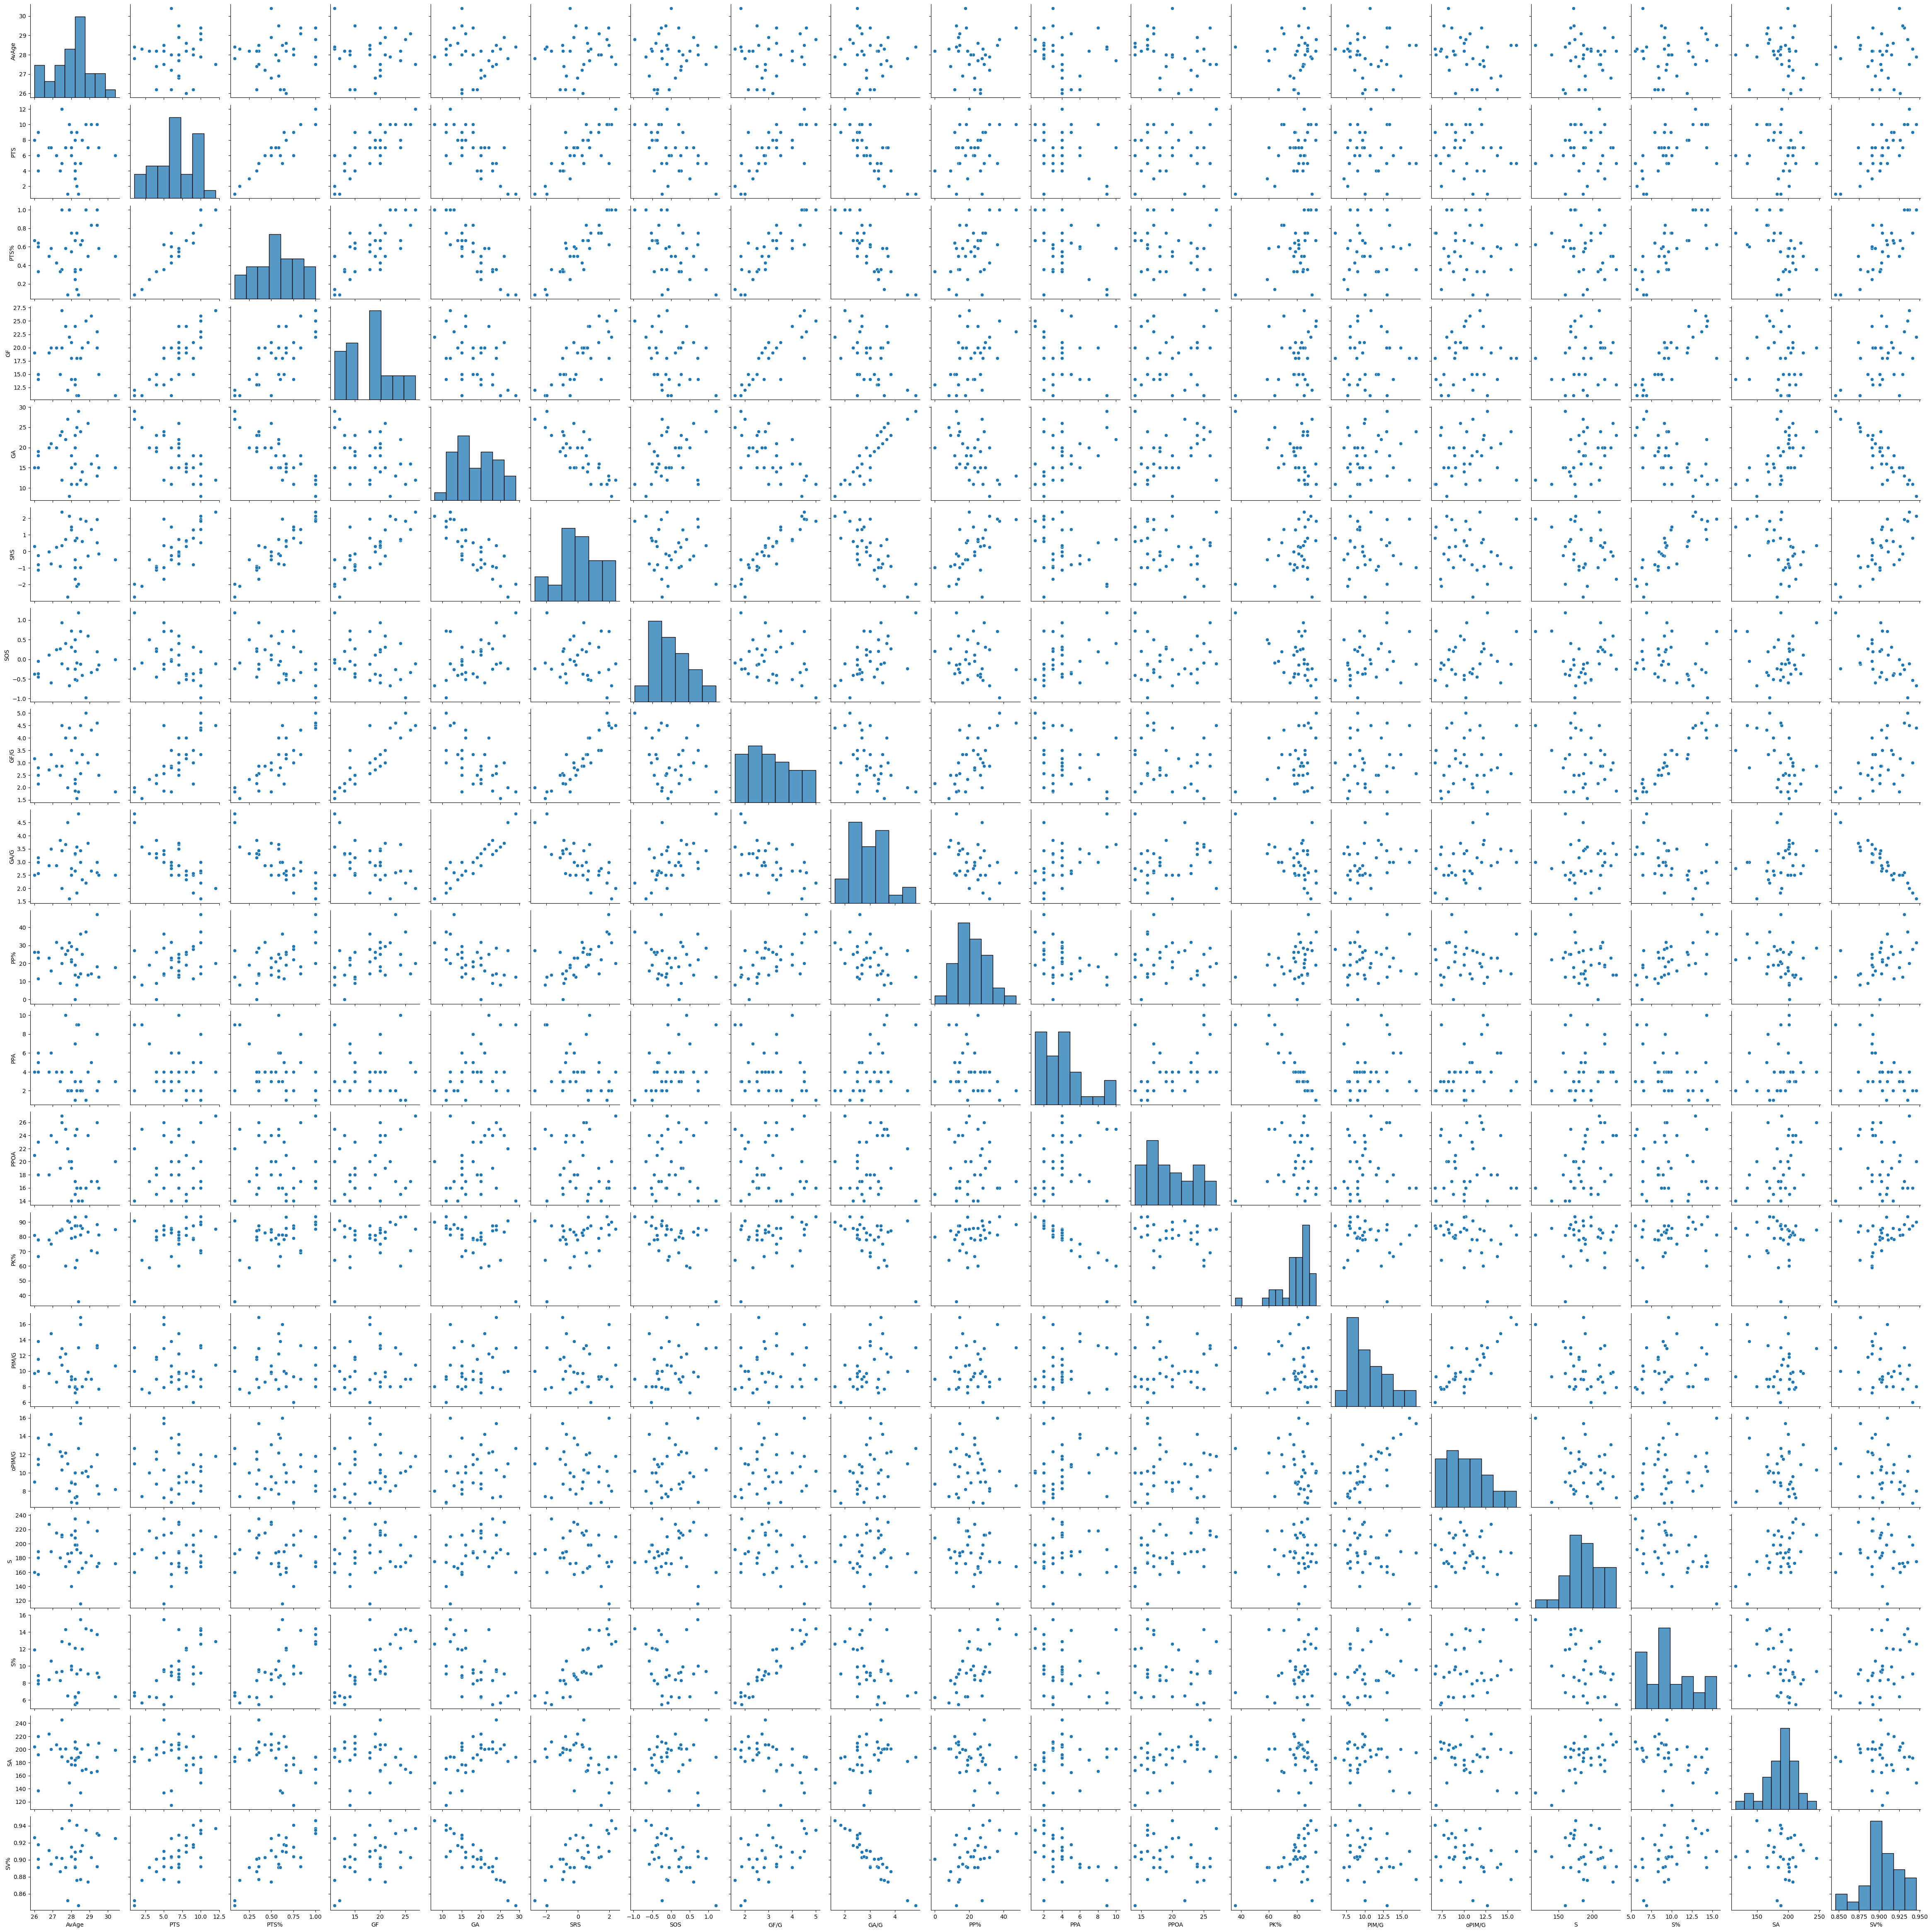

In [ ]:
sns.pairplot(df_excel.drop(columns=['Rk', 'Unnamed: 1', 'SO', 'GP', 'W', 'L', 'OL', 'SH', 'SHA', 'SOW', 'SOL', 'PP', 'PPO']))

### Write to a CSV

Just as we pulled data in from a CSV, we can write out to one as well. This is a common way to save the results of our work, or to save a subset of the data for later use. One thing that this is useful for is if we are doing something that involves a lot of data manipulation, we can write our code to do our data manipulation, save the output, then we don't need to redo it to use the data. This starts to become important when we have a lot of data and data manipulation takes a long time - we don't want to spend 5 hours waiting for our program to run and clean up our data every time we want to do something with it.

In [ ]:
df.to_csv('temp_output.csv')


Interacting with the underlying computer is explicitly not really a huge focus for what we need to do in data science, but it's good to know that it's possible, and it is sometimes critical. Calls like this to interact with the computer are much more common in other types of programming, such as if you were making an application with a UI. In data science we are mainly focused on just grabbing some data, then we do all of our work inside our program, so we don't need to interact with the computer much. This also has the advantage of making our programs fairly portable, as we'll see later when we use Colab to run our code in the cloud.

### Getting Ready to Machine Learn

This notebook covers what we normally need to do to get to the starting point of actually analyzing data and doing some machine learning. We'll need to load in some data, then we'll want to explore it to get a feel for what we have, then do any "cleaning" or preparation, and finally start doing actual analysis. 

### Appendix: Installing Things and Magic Commands

<b>Note:</b> this is something that is common, and fairly simple. In short, this is how we can install packages in python that we want to use and don't currently exist in the Colab environment.

We can install libraries from within our notebook using the `!pip install` command. This is a "magic" command, which is a special command that is only available in Jupyter notebooks. The `!` at the beginning of the command tells the notebook that this is a magic command, and not a normal Python command. The `pip` command is the Python package manager, which is a program that knows how to download and install Python libraries. The `install` command is the command that tells pip to install something. The `pandas` part is the name of the library that we want to install.

We can also do this from the command line, which is the 'normal' way to do it when using our computers. What this magic command can do for us is to help make it easy to run our code anywhere, such as Colab on the cloud. If we install the libraries we need from within our notebook, then we can run the notebook anywhere and it will have everything it needs to run. For the most part, the things we use in data science are pretty common, so it is unlikely that we'll try to install anything that can't be found.

In [ ]:
#!pip install pandas